<a href="https://colab.research.google.com/github/perlsanchi/K-Means-Clustering/blob/main/Mall_Customer_Segmentation_using_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello Everyone, Let us discuss today K means clustering using unsupervised learning algorithm.

About the dataset:
Here, i am having columns as : Customer ID (no need), age, gender, annual income and spending score. 



What is K- Means Clustering?

To find intrinsic groups from unlabelled dataset, we use K means Clustering. Here, no target variables are present, only input dataset which represents the data. Also, it is termed as Centeroid based clustering. Centeroid is the data point at the center of the cluster. The algorithm works on iteration until it reaches a stop where either we get similar results or maximum iteration is reached. For choosing the optimal value of K we use elbow method.

Let us start with our code:

Import the datasets:

In [89]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly as px
import plotly.graph_objs as go


In [90]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [91]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
print(data.head())
print("**************************************************")
print(data.tail())
print("**************************************************")
print(data.head(2))
print("**************************************************")
print(data.shape)
print("**************************************************")
print(data.shape[0])
print("**************************************************")
print(data.shape[1])
print("**************************************************")
print(data.info())
print("**************************************************")
print(data.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
**************************************************
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83
**************************************************
   CustomerID Gender  Age  Annual 

In [93]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No, null values - But.... there might be some hidden value, let us be a detective and find them.

In [94]:
missing_values = ["N/a", "np.nan", "na"]
data = pd.read_csv("/content/Mall_Customers.csv", na_values = missing_values)


In [95]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Now, we are sure, there are no missing values.

Let us drop customer id as it is not needed.

In [96]:
data = data.drop(['CustomerID'], axis = 1)

In [97]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Rename the rest of the columns to appropriate names.

In [98]:
data.rename(columns = {'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'} , inplace = True)

In [99]:
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [100]:
duplicate_rows_data = data[data.duplicated()]
data.drop_duplicates(inplace = True)


In [101]:
data.shape

(200, 4)

In [102]:
numerical = data.select_dtypes(exclude = 'object')
categorical = data.select_dtypes(include = 'object')


In [103]:
data["Age"].nlargest(3)


60    70
70    70
57    69
Name: Age, dtype: int64

In [104]:
data["Age"].nsmallest(3)

33    18
65    18
91    18
Name: Age, dtype: int64

<Axes: >

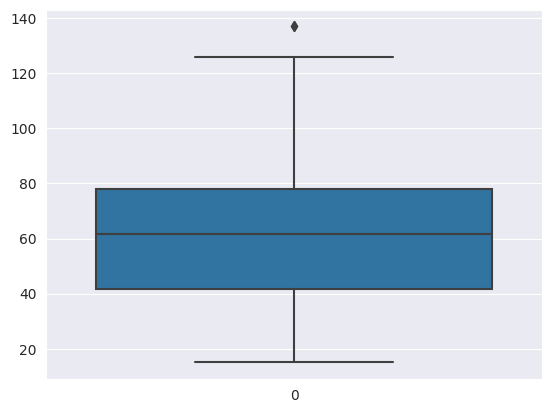

In [105]:
sns.boxplot(data['Income'])

<Axes: >

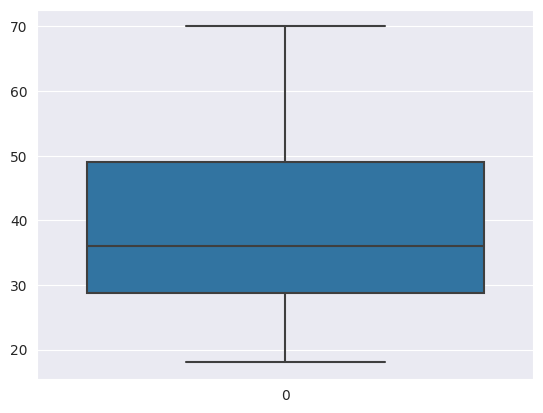

In [106]:
sns.boxplot(data['Age'])

<Axes: xlabel='Gender', ylabel='Income'>

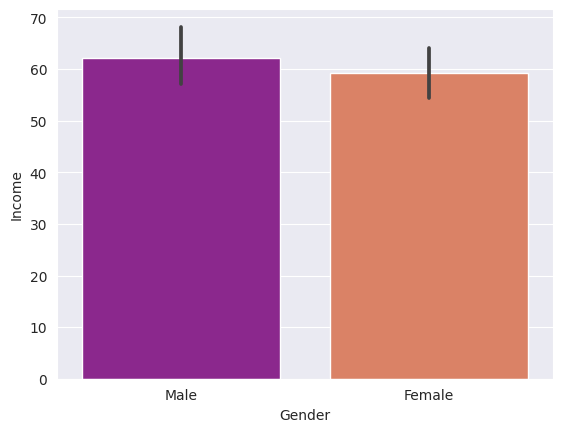

In [107]:
sns.set_style('darkgrid')
sns.barplot(x ='Gender', y ='Income', data = data, palette ='plasma')


<Axes: xlabel='Age', ylabel='Income'>

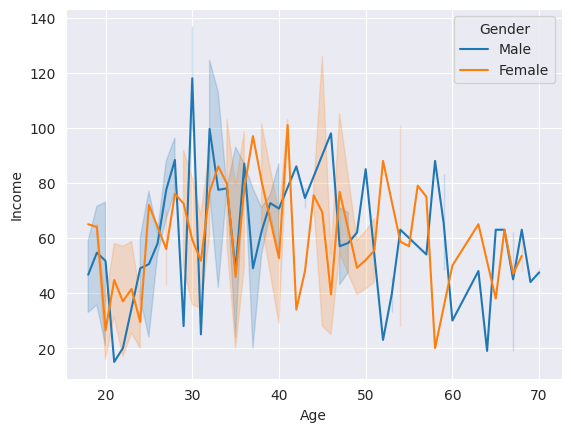

In [108]:
sns.lineplot(data=data, x="Age", y="Income", hue = 'Gender')

It has been observed from the above chart that people having age 30 to 32 are having more income and are male

Let us view Gender Column:

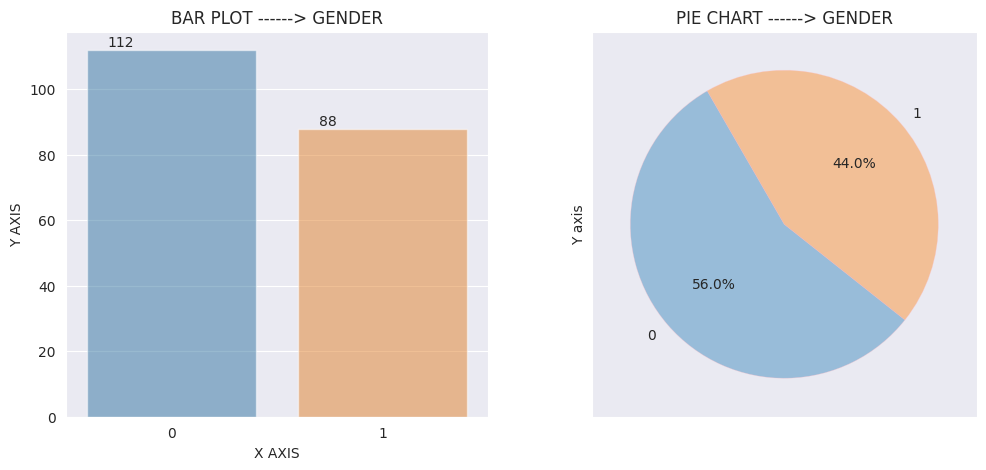

In [154]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("BAR PLOT ------> GENDER")
ax = sns.countplot(x="Gender",
                   data=data,
                   order=data['Gender'].value_counts().index,
                   alpha=0.5)
for i in ax.patches:
   ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.10, i.get_height()+1))

plt.xlabel('X AXIS')
plt.ylabel('Y AXIS')
plt.box(True)

plt.subplot(1,2,2)
plt.title("PIE CHART ------> GENDER")
data['Gender'].value_counts().plot(kind='pie',
                                 legend=None,
                                 ylabel='Y axis',
                                 startangle=120,
                                 wedgeprops={'alpha':0.4,
                                             'edgecolor' : 'pink',
                                             'linewidth': 0.5,
                                             'antialiased': True},
                                 autopct='%1.1f%%')
plt.box(True)
plt.show()


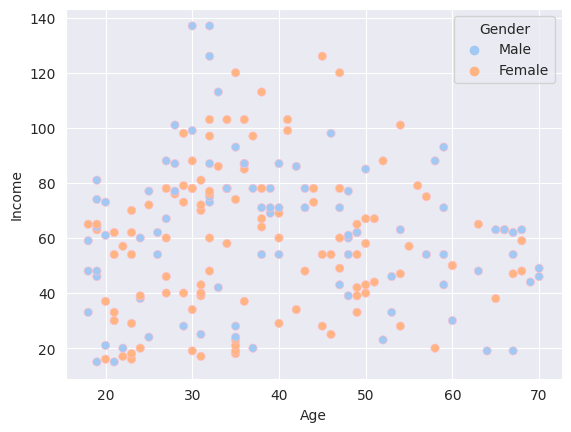

In [111]:
sns.scatterplot(x = numerical['Age'],y = numerical['Income'],data=data,hue = 'Gender',palette = 'pastel',edgecolor = 'pink');

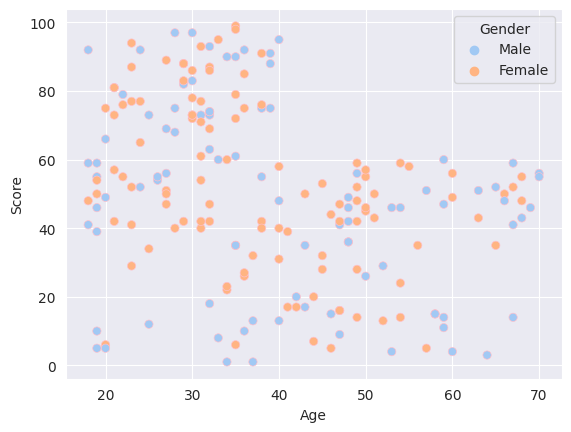

In [112]:
sns.scatterplot(x = numerical['Age'],y = numerical['Score'],data=data,hue = 'Gender',palette = 'pastel',edgecolor = 'pink');

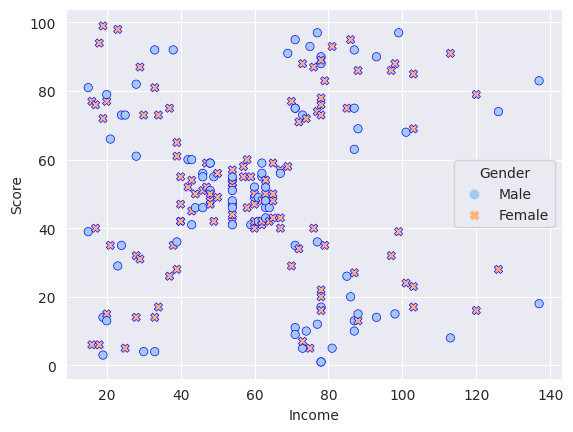

In [113]:
sns.scatterplot(x = numerical['Income'],y = numerical['Score'],data=data,hue = 'Gender',palette = 'pastel', style = 'Gender', edgecolor = 'blue');

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [115]:
data.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Taking copies of data

In [116]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

Scaling:Taking all columns

In [117]:
from sklearn.preprocessing import StandardScaler
x = data1.iloc[:,[0,1,2,3]].values
scaler = StandardScaler()
k_means =  scaler.fit_transform(x)



In [118]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(k_means)
    wcss.append(kmeans.inertia_)


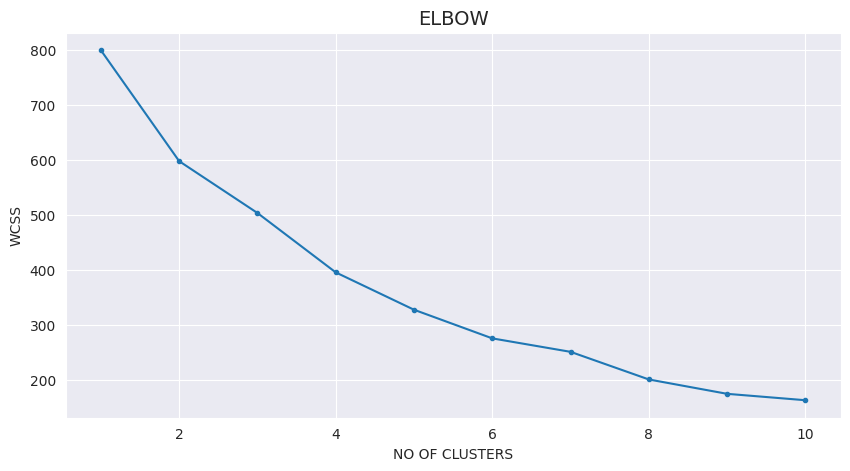

In [119]:
plt.subplots(figsize=(10,5))
plt.plot(range(1,11),
         wcss,
         marker='o',
         markersize='3')

plt.title('ELBOW', fontsize=14)
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()


In [157]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
from kneed import KneeLocator

In [122]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow
clusters = KMeans(n_clusters =kl.elbow, init = 'k-means++', random_state = 42, n_init='auto')
y_kmeans = clusters.fit_predict(x)
y_kmeans


array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [123]:
df = data1.copy()
df['cluster'] = y_kmeans
df.head()


,Gender,Age,Income,Score,cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


POOR CLUSTERS.... Let us use single single feature and try to cluster it again.

In [124]:
from sklearn.preprocessing import StandardScaler
x = data2.iloc[:,[1,2,3]].values
scaler = StandardScaler()
k_means =  scaler.fit_transform(x)



In [125]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(k_means)
    wcss.append(kmeans.inertia_)


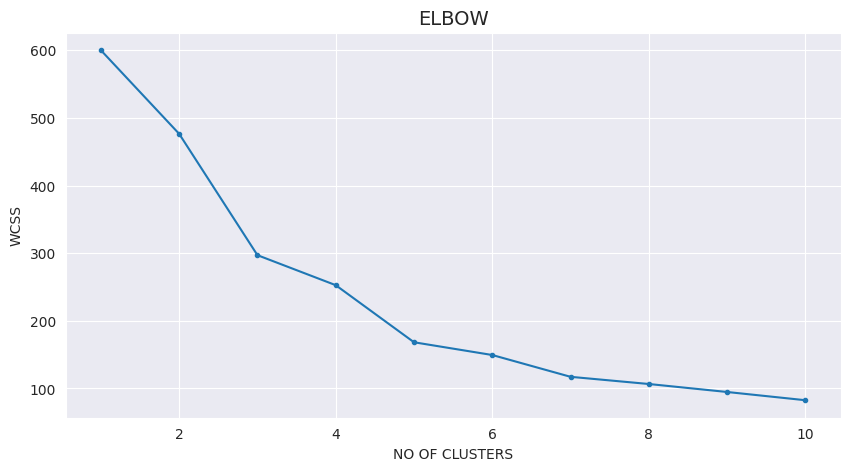

In [126]:
plt.subplots(figsize=(10,5))
plt.plot(range(1,11),
         wcss,
         marker='o',
         markersize='3')

plt.title('ELBOW', fontsize=14)
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()


In [127]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow
clusters = KMeans(n_clusters =kl.elbow, init = 'k-means++', random_state = 42, n_init='auto')
y_kmeans = clusters.fit_predict(x)
y_kmeans

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [128]:
df = data2.copy()
df['cluster'] = y_kmeans
df.head()

,Gender,Age,Income,Score,cluster
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1


In [129]:
df.head(30)

,Gender,Age,Income,Score,cluster
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1
5,0,22,17,76,4
6,0,35,18,6,1
7,0,23,18,94,4
8,1,64,19,3,1
9,0,30,19,72,4


In [130]:
df.tail(30)

,Gender,Age,Income,Score,cluster
170,1,40,87,13,3
171,1,28,87,75,2
172,1,36,87,10,3
173,1,36,87,92,2
174,0,52,88,13,3
175,0,30,88,86,2
176,1,58,88,15,3
177,1,27,88,69,2
178,1,59,93,14,3
179,1,35,93,90,2


In [131]:
df.head(50)

,Gender,Age,Income,Score,cluster
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1
5,0,22,17,76,4
6,0,35,18,6,1
7,0,23,18,94,4
8,1,64,19,3,1
9,0,30,19,72,4


From the above observations, it has been observed that.

Cluster 1 represents ▶ People with score less than 40 and lowest income and age varies.

Cluster 2 represents ▶ People with best score and highest income having age around 28 to 40s

Cluster 3 represents ▶ People with less score and more income.

Cluster 4 represents ▶ People with moderate score and okay income.

Cluster 0 represents ▶ Income of people having around 40 and score around same range.

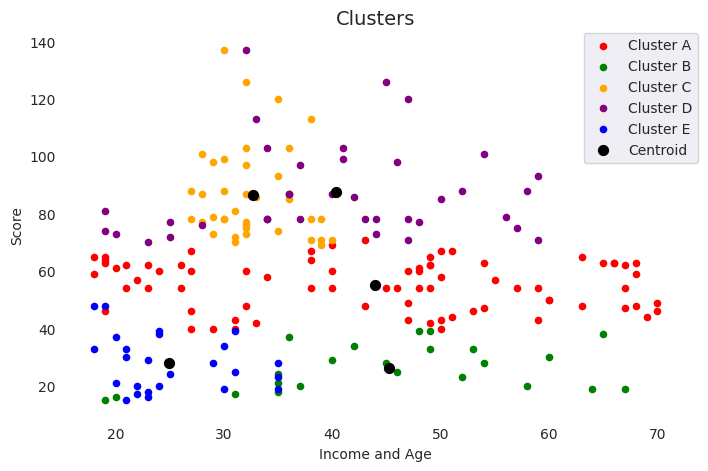

In [132]:
plt.figure(figsize=(8,5))

# Plotting each of the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster A')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'green', label = 'Cluster B')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'orange', label = 'Cluster C')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 20, c = 'purple', label = 'Cluster D')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 20, c = 'blue', label = 'Cluster E')

# Plotting the centriod
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroid')

# Others
plt.title('Clusters', fontsize=14)
plt.xlabel('Income and Age')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(False)
plt.show()


I didn't got the accuracy i was expecting. Let me exclude the age feature too.. 

In [133]:
from sklearn.preprocessing import StandardScaler
x = data3.iloc[:,[2,3]].values
scaler = StandardScaler()
k_means =  scaler.fit_transform(x)

In [134]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(k_means)
    wcss.append(kmeans.inertia_)

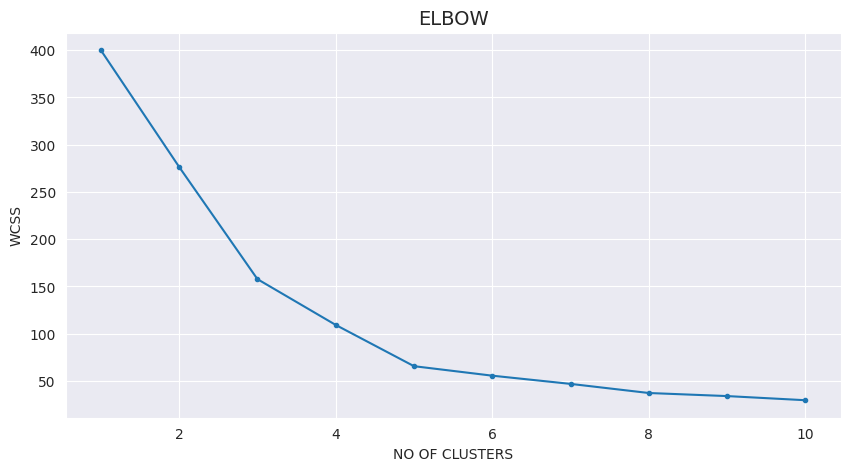

In [135]:
plt.subplots(figsize=(10,5))
plt.plot(range(1,11),
         wcss,
         marker='o',
         markersize='3')

plt.title('ELBOW', fontsize=14)
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [137]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow
clusters = KMeans(n_clusters =kl.elbow, init = 'k-means++', random_state = 42, n_init='auto')
y_kmeans = clusters.fit_predict(x)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [138]:
df = data3.copy()
df['cluster'] = y_kmeans
df.head()

,Gender,Age,Income,Score,cluster
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2


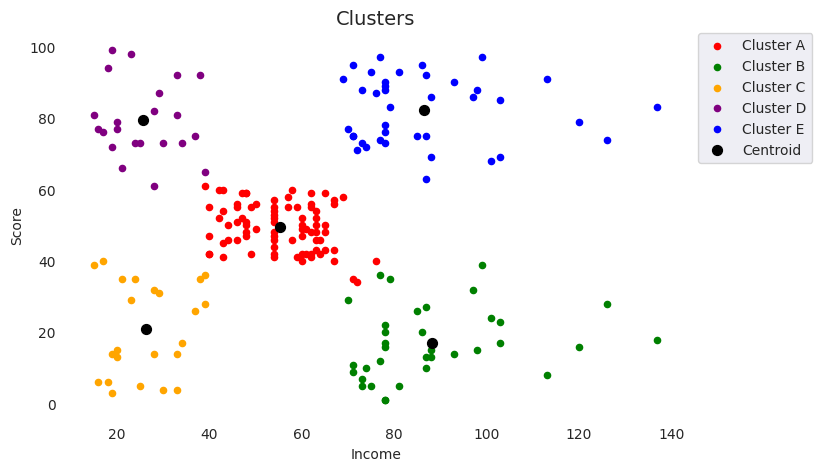

In [140]:
plt.figure(figsize=(8,5))

# Plotting each of the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster A')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'green', label = 'Cluster B')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'orange', label = 'Cluster C')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 20, c = 'purple', label = 'Cluster D')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 20, c = 'blue', label = 'Cluster E')

# Plotting the centriod
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroid')

# Others
plt.title('Clusters', fontsize=14)
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(False)
plt.show()

FINAL CONCLUSION:

RED CLUSTER A - People with income between 40 and 60 have same score between 40 and 60.

GREEN CLUSTER B - People with highest income also have less score.
YELLOW CLUSTER C - People with less income have less score.
PURPLE CLUSTER D - People with less income have highest score.
BLUE CLUSTER E - People with highest income have highest score.